In [1]:
#BHARTH INTERN 
#TASK 2 : WINE QUALITY PREDICTION

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing  import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

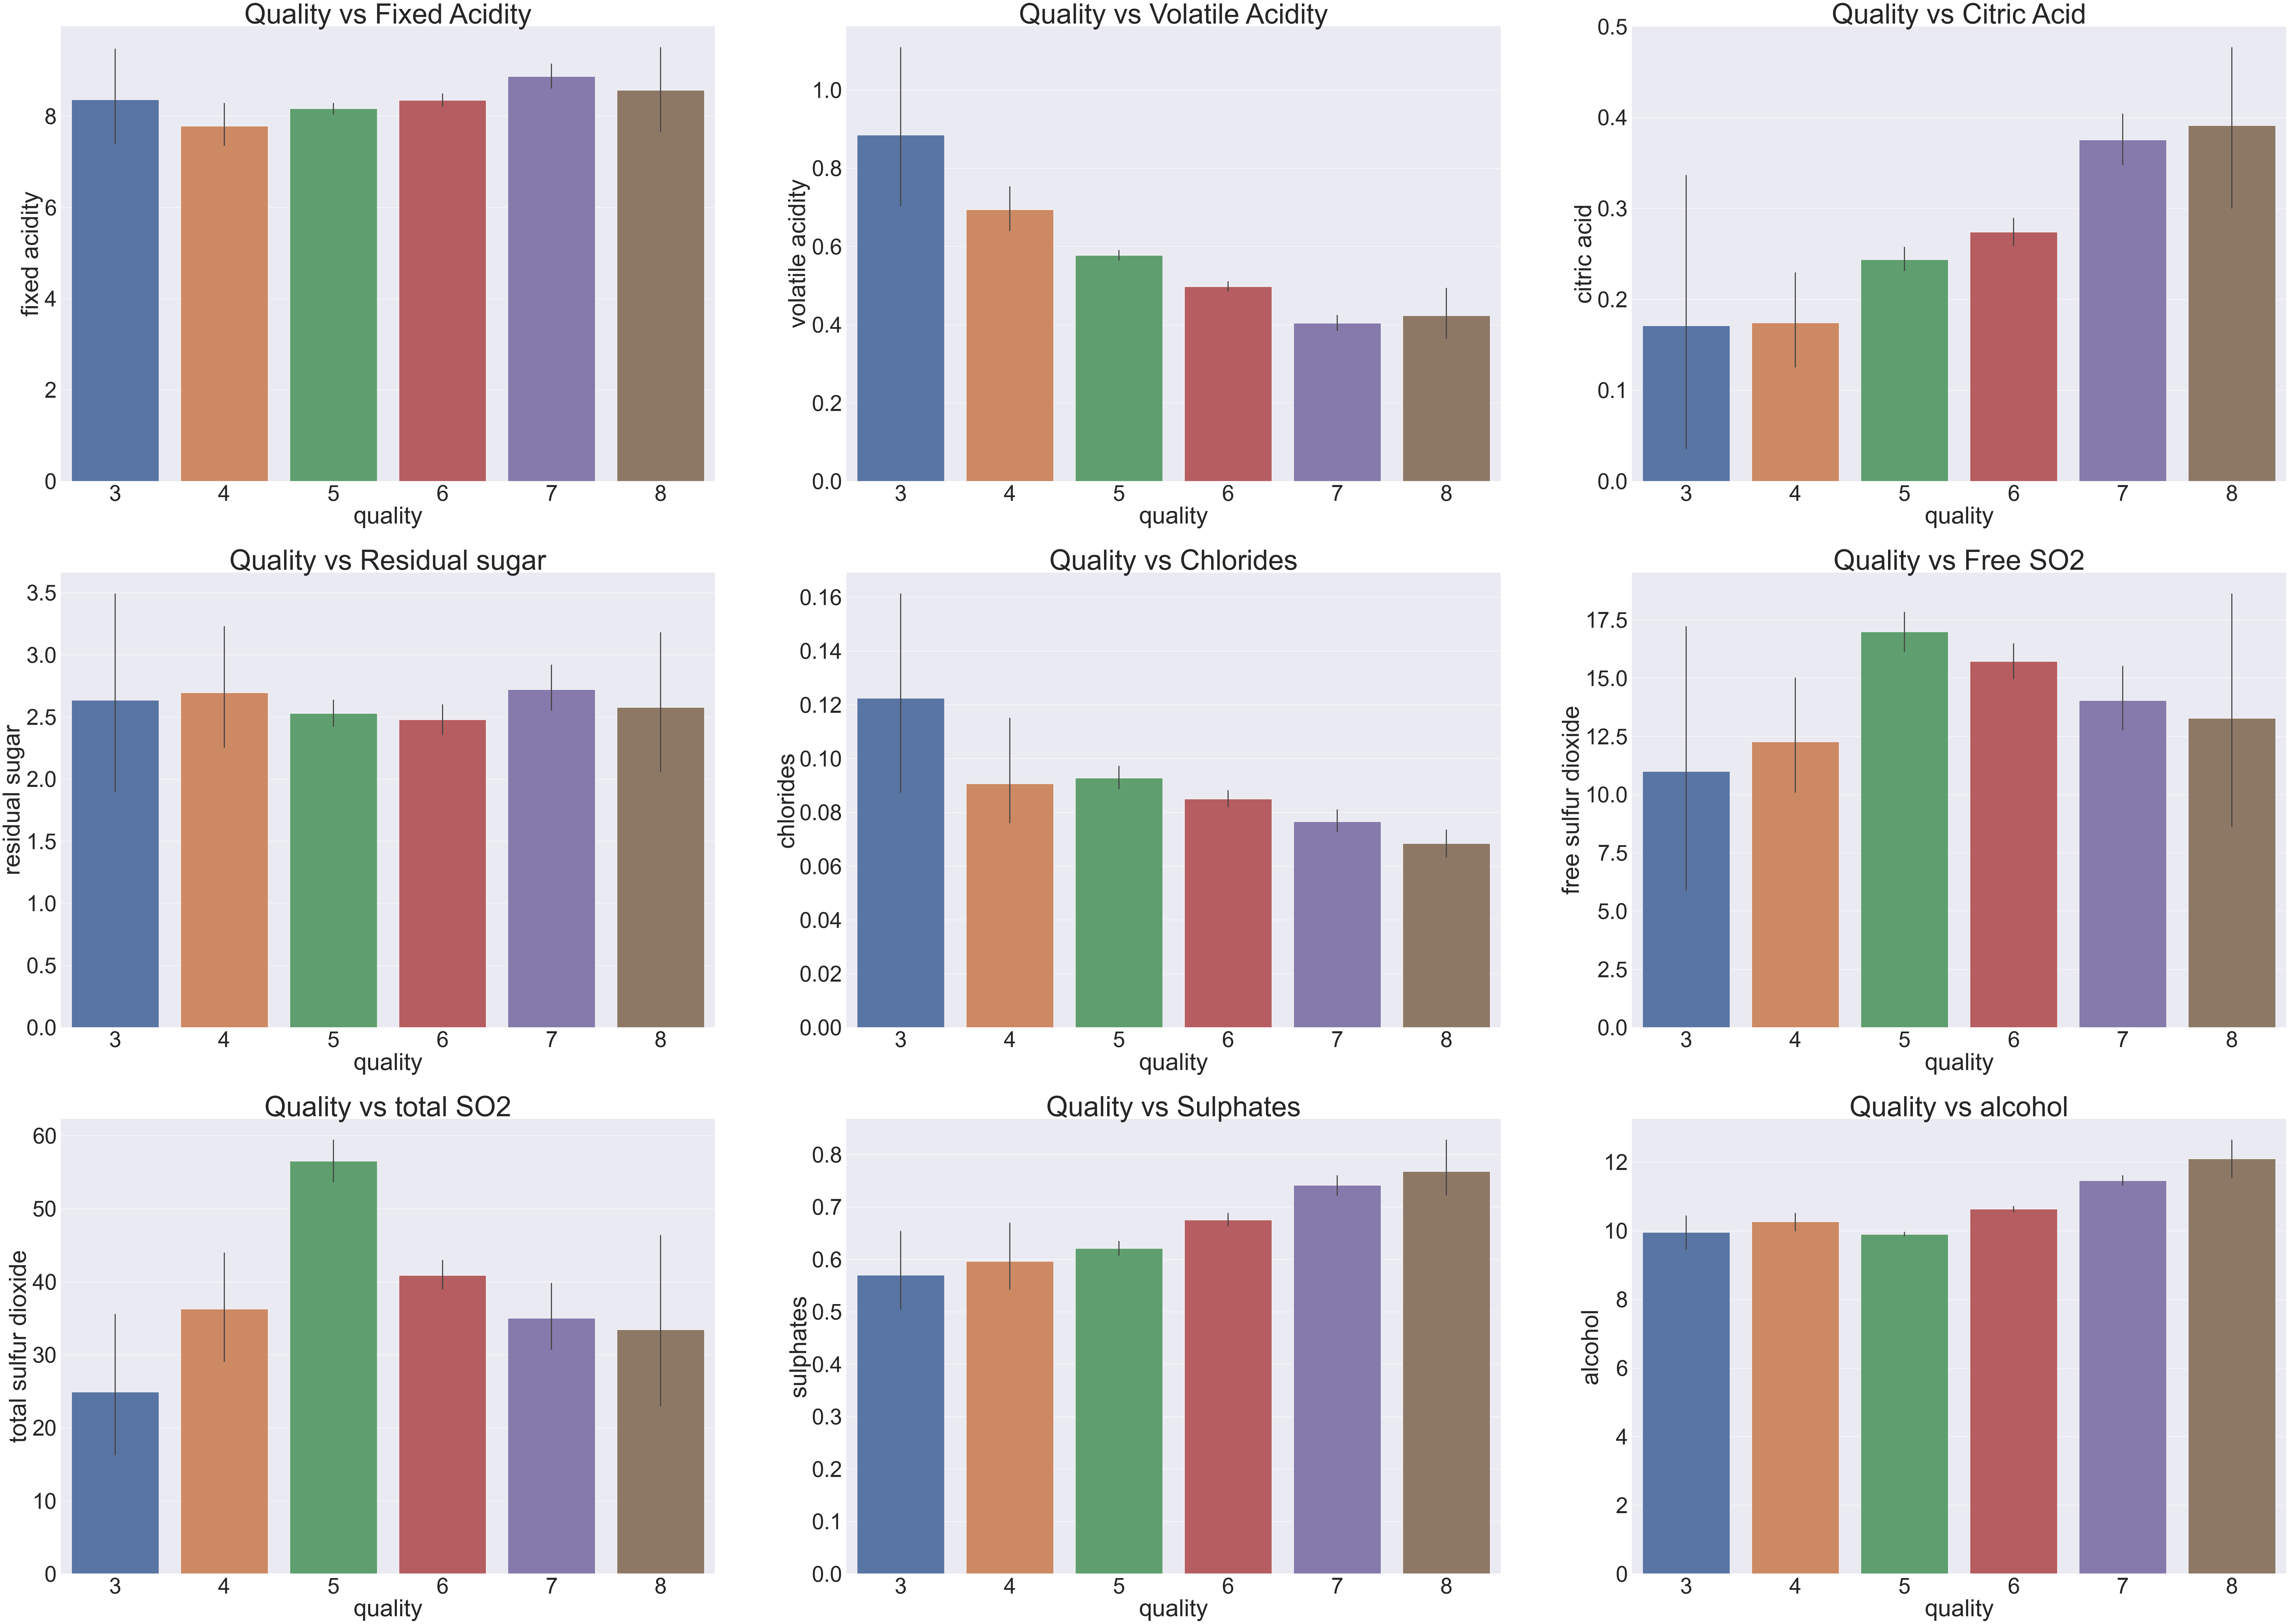

In [6]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity", fontsize=70)
sns.barplot(x='quality', y='fixed acidity', data=df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity", fontsize=70)
sns.barplot(x='quality', y='volatile acidity', data=df)

plt.subplot(333)
plt.title("Quality vs Citric Acid", fontsize=70)
sns.barplot(x='quality', y='citric acid', data=df)

plt.subplot(334)
plt.title("Quality vs Residual sugar", fontsize=70)
sns.barplot(x='quality', y='residual sugar', data=df)

plt.subplot(335)
plt.title("Quality vs Chlorides", fontsize=70)
sns.barplot(x='quality', y='chlorides', data=df)

plt.subplot(336)
plt.title("Quality vs Free SO2", fontsize=70)
sns.barplot(x='quality', y='free sulfur dioxide', data=df)


plt.subplot(337)
plt.title("Quality vs total SO2", fontsize=70)
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

plt.subplot(338)
plt.title("Quality vs Sulphates", fontsize=70)
sns.barplot(x='quality', y='sulphates', data=df)

plt.subplot(339)
plt.title("Quality vs alcohol", fontsize=70)
sns.barplot(x='quality', y='alcohol', data=df)

In [7]:
bins = [2,6.5, 8]
classes = ['bad','good']
df['quality']= pd.cut(df['quality'], bins=bins, labels= classes)

In [8]:
label_quality = LabelEncoder()

In [9]:
df['quality']= label_quality.fit_transform(df['quality'])

In [10]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
X=df.drop('quality', axis=1)
Y=df['quality']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=21)

In [14]:
sc= StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [16]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
pred_RF = RF.predict(X_test)

In [17]:
pred1 = accuracy_score(Y_test, pred_RF)
print(pred1*100)

90.3125


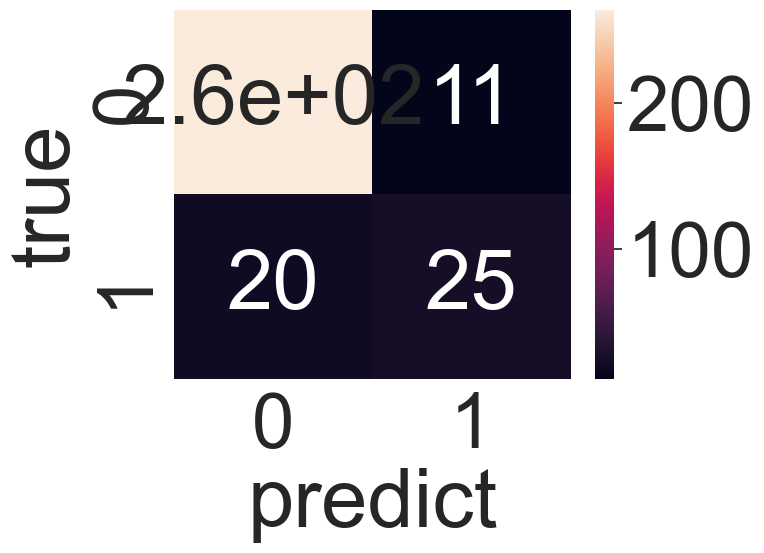

In [18]:
cm1= confusion_matrix(Y_test, pred_RF)
ax1 = sns.heatmap(cm1, annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

In [19]:
LR= LogisticRegression().fit(X_train, Y_train)

logistic regression accuracy score : 88.75


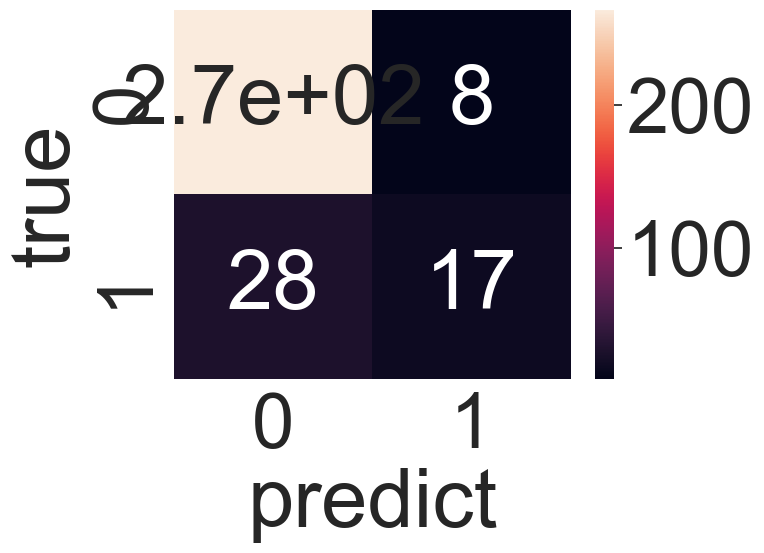

In [20]:
pred_LR = LR.predict(X_test)
cm2 = confusion_matrix(Y_test, pred_LR)
ax2 = sns.heatmap(cm2, annot=True)
ax2.set(xlabel='predict', ylabel='true')
pred2 = accuracy_score(Y_test, pred_LR)
print("logistic regression accuracy score :", pred2*100)